# Introductory Notebook

This notebook introduces the main functionalities of the software in this folder.

The general workflow is:
- set relevant variables in a jupiter notebook
- call some compiled Fortran subroutine from the same notebook
- analyze the outputs in the same notebook

In order to follow this workflow, the Fortran subroutines must be compiled first.


### Compilation of the Fortran code
In the next cell we:
- go to the fortran_src/ folder which contains Fortran modules
- use a specific conda environment ('simple_env') to compile the refolding_many_temperatures.f90 Fortran source
- create the folder compiled_python_modules/ (if it does not exist)
- move the compiled executable into compiled_python_modules/
- get back to the current folder

In [1]:
%cd fortran_src
!conda run -n simple_env \
    python3 -m numpy.f2py -c -m \
    refolding_many_temperatures \
    refolding_many_temperatures.f90 --opt='-O3'
%mkdir -p ../compiled_python_modules
%mv refolding_many_temperatures*.so ../compiled_python_modules/
%cd ..


/Users/daviderevignas/scientific_projects/scientific_code/LatPro_reduced/fortran_src
running build
running config_cc
INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
INFO: unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
INFO: build_src
INFO: building extension "refolding_many_temperatures" sources
INFO: f2py options: []
INFO: f2py:> /var/folders/n5/f496lkj93z1d5p8bbkfqkhtr0000gn/T/tmpf8nt5nwm/src.macosx-11.0-arm64-3.9/refolding_many_temperaturesmodule.c
creating /var/folders/n5/f496lkj93z1d5p8bbkfqkhtr0000gn/T/tmpf8nt5nwm/src.macosx-11.0-arm64-3.9
Reading fortran codes...
	Reading file 'refolding_many_temperatures.f90' (format:free)
Post-processing...
	Block: refolding_many_temperatures
			Block: run_refolding_simulations
In: :refolding_many_temperatures:refolding_many_temperatures.f90:run_refolding_simulations
analyzevars: could not parse dimension for variable '(n_monomer

### Importing relevant modules
In the next cell we:
- import commonly used modules such as numpy and matplotlib
- import our compiled Fortran module refolding_many_temperatures
- import some general python variables and functions from general_python_module

In [1]:
import os 
import sys
module_path = "compiled_python_modules/"
sys.path.append(module_path)
import refolding_many_temperatures

import numpy as np
import matplotlib.pyplot as plt

from general_python_module import *

### Load relevant variables

In [2]:
MJ_tab_6 = load_MJ_tab_6() # conventional order of amino acids given by num_to_letter_map variable
hamiltonian_walks_max_abs_GE=load_hamiltonian_walks_max_abs_GE()
hamiltonian_walks_i1_i2=load_hamiltonian_walks_maGE_loop_i1_i2()
hamiltonian_walks_maGE_thread_is_N=load_hamiltonian_walks_maGE_thread_is_N()


### Plot the distribution of the Gaussian enanglement
One of the loaded variables, `hamiltonian_walks_max_abs_GE`, contains the calculated value of maximum absolute Gaussian enanglement of each of the 103346 Hamiltonain walks on the 3x3x3 cubic lattice.
 
The following cell plots the histogram of such values.

Text(0, 0.5, 'PDF')

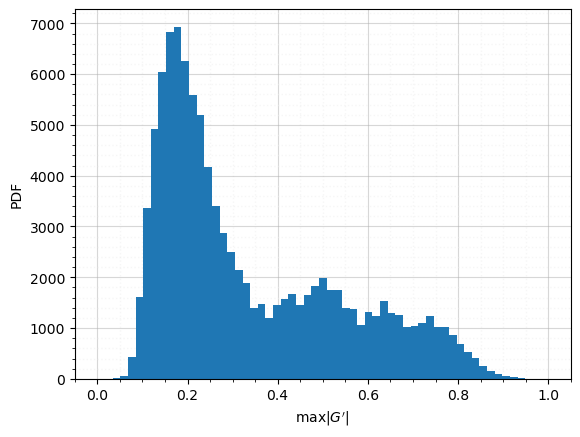

In [ ]:
fig,ax=simple_plot_with_grid()
_=ax.hist(hamiltonian_walks_max_abs_GE,bins=np.linspace(0,1,60))
ax.set_xlabel("$\max |G'|$")
ax.set_ylabel("PDF")

In [ ]:
i_struct=897
numeric_msa=np.loadtxt(f"data/sequences_data/z_score_opt_sequences/struct_{i_struct:06d}/numeric_msa.txt",dtype=np.int32)

